In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Function to generate a grid of coordinates in numpy
#Resulting grid is indexed [coordinate, (x or y)][x grid position][y grid position]
def GenerateEqualSpaced2dGridCoordinates(grid_dimension):
    #Single axis coordinate ticks, we only use square grids, just an ascending list
    GeneratingAxis = np.array(list(range(0,grid_dimension)))
    
    #Build an array of appropriate size, square of grid points, each point has 2! values, its x coordinate, and y coordinate
    CoordinateField = np.zeros((2,GeneratingAxis.size, GeneratingAxis.size))
    
    #Iterate each gridpoint, and fill in its position values
    for cx, iy, ix in np.ndindex(CoordinateField.shape):
        CoordinateField[0][ix][iy] = ix #Write x coordinate
        CoordinateField[1][ix][iy] = iy #Write y coordinate
        
    #Return the grid
    return CoordinateField


In [3]:
#Generate an example grid, 256x256 grid points
gridcoords = GenerateEqualSpaced2dGridCoordinates(256)

In [4]:
#Find the distance of each grid coordinate to a set location c, if c is not specified, just choose the center
#of the provided grid
def GridCoordinatesToDistances(x,c = "NaN"):
    if c == "NaN":
        #c not provided by user, just pick the center of the grid
        c = (x[0][x.shape[1] // 2][0] , x[1][0][x.shape[2] // 2])
    xp = x[0] - c[0]
    yp = x[1] - c[1]
    #D = v((x-c_x)^2 + (y-c_y)^2) 
    #Apply the distance formula on all grid points
    return np.sqrt(np.sum(np.square(np.array([xp,yp])),axis = 0))

In [5]:
#Generate example distances
distances = GridCoordinatesToDistances(gridcoords)

In [6]:
distances

array([[181.01933598, 180.31361568, 179.61069011, ..., 178.9105922 ,
        179.61069011, 180.31361568],
       [180.31361568, 179.60512242, 178.89941308, ..., 178.19652073,
        178.89941308, 179.60512242],
       [179.61069011, 178.89941308, 178.19090886, ..., 177.48521065,
        178.19090886, 178.89941308],
       ...,
       [178.9105922 , 178.19652073, 177.48521065, ..., 176.7766953 ,
        177.48521065, 178.19652073],
       [179.61069011, 178.89941308, 178.19090886, ..., 177.48521065,
        178.19090886, 178.89941308],
       [180.31361568, 179.60512242, 178.89941308, ..., 178.19652073,
        178.89941308, 179.60512242]])

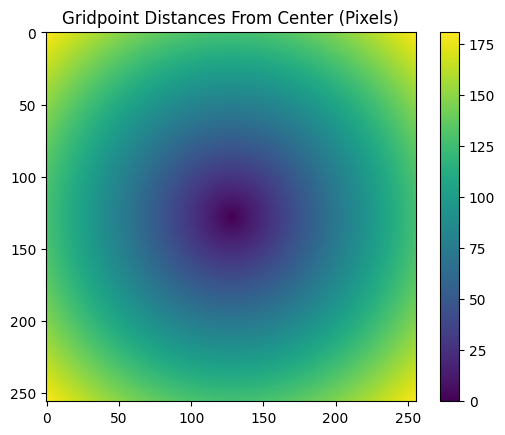

In [7]:
plt.title("Gridpoint Distances From Center (Pixels)")
plt.imshow(distances)
plt.colorbar()

In [8]:
#Take in some grid coordinates, and output a 2d gaussian, whos square integral is one, and whose width is sigma
#(same idea as normalization in quantum mechanics)

def NormalizedGaussian(coordinates, sigma):
    #The gaussian falls as the distance to its center squared, with rate scaling by sigma, the distribution width
    unnormalized_gaussian = np.exp(-(GridCoordinatesToDistances(coordinates)/sigma)**2)
    
    #Return the gaussian, but normalized
    return unnormalized_gaussian/np.sqrt(np.sum(np.square(unnormalized_gaussian)))
    

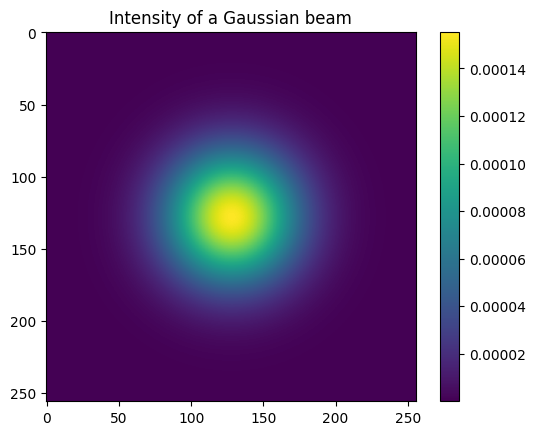

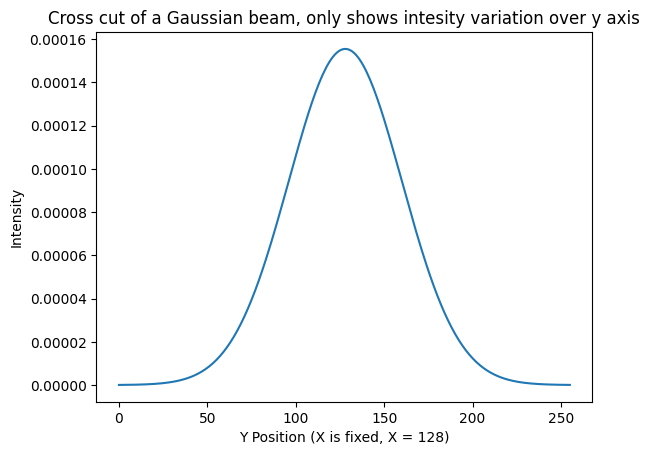

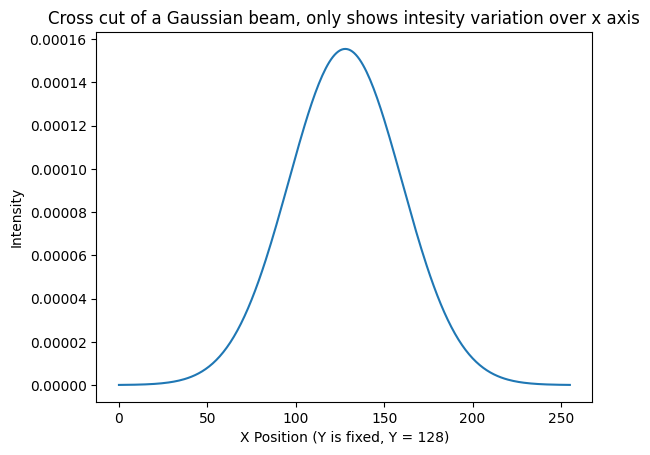

In [9]:
#Take a grid of complex numbers (can represent a laser beam cross section), and give a 
#plot of its intensity
def PlotAmplitudeIntensity(twod_field):
    #Note the intensity is the square of the complex magnitude. The E/B field squared
    #gives energy density
    plt.imshow(np.square(np.abs(twod_field)))
    plt.colorbar()

#Generate an example Gaussian laser field
ideal_laser_beam_field = NormalizedGaussian(gridcoords, 64)

#Example plots with the Gaussian beam
plt.title("Intensity of a Gaussian beam")
PlotAmplitudeIntensity(ideal_laser_beam_field)
plt.show()

plt.title("Cross cut of a Gaussian beam, only shows intesity variation over y axis")
plt.xlabel("Y Position (X is fixed, X = 128)")
plt.ylabel("Intensity")
plt.plot(np.square(ideal_laser_beam_field[ideal_laser_beam_field.shape[0]//2][:]))
plt.show()

plt.title("Cross cut of a Gaussian beam, only shows intesity variation over x axis")
plt.xlabel("X Position (Y is fixed, Y = 128)")
plt.ylabel("Intensity")
plt.plot(np.square(ideal_laser_beam_field[:][ideal_laser_beam_field.shape[0]//2]))
plt.show()

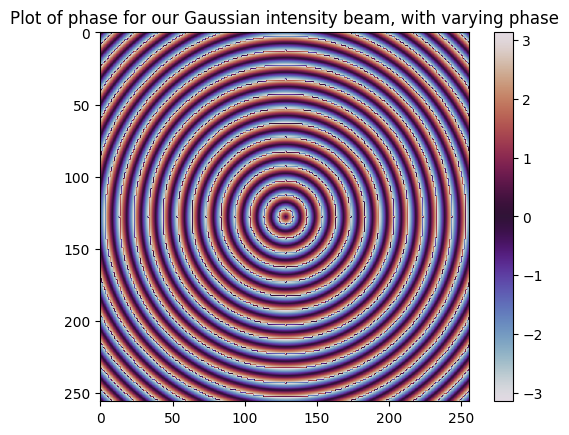

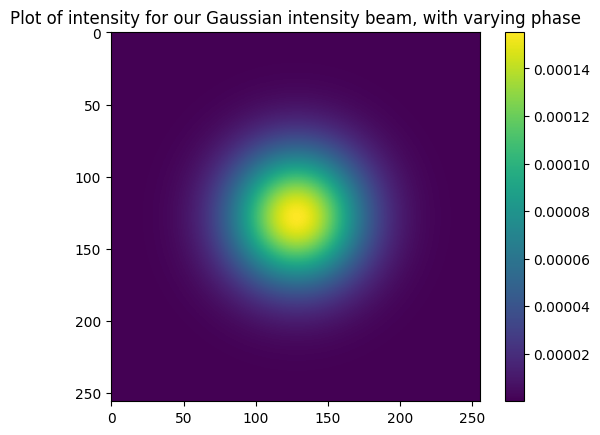

In [17]:
#We want to add phase to our Gaussian beam, to model non-ideal lasers
def PlotAmplitudePhase(twod_field):
    #Note: cmap = "twilight", this is a cyclic color map, which is useful when the plotted value is cyclic
    #(like the phase of a complex number) Notice how the color repeats for +/- pi
    #We set the limits of our phase plot to +/- pi, this represents the full unit circle
    plt.imshow(np.angle(twod_field), cmap = "twilight", vmin = -1.0 * np.pi, vmax = 1 * np.pi)
    plt.colorbar()
    
#Multiply a radial phase on the beam, "np.exp(i * distance / ...[scaling])" makes the phase vary with radius
#in python we write complex numbers as a + bj, instead of a + bi like in physics
#Multiplying by a phase exp(ix) where x is arbitrary does not spoil normalization, since exp(ix) has complex
#magnitude of 1.0
final_field = ideal_laser_beam_field * np.exp(1.0j * np.pi/1/5 * distances)

#Show phase of the new field using our function
plt.title("Plot of phase for our Gaussian intensity beam, with varying phase")
PlotAmplitudePhase(final_field)
plt.show()
plt.title("Plot of intensity for our Gaussian intensity beam, with varying phase")
PlotAmplitudeIntensity(final_field)

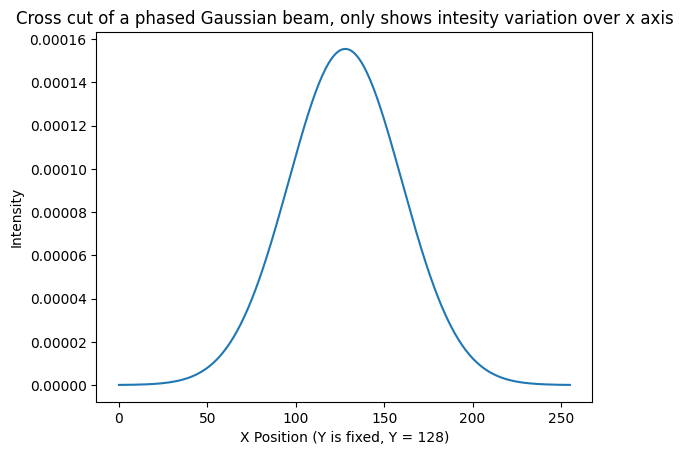

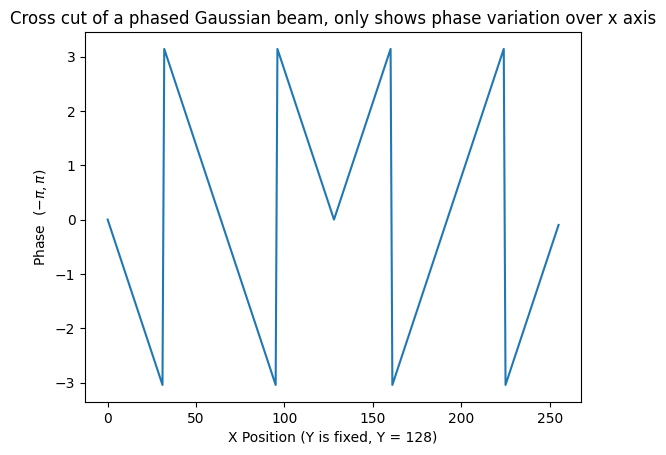

In [29]:
#Cross cut plots for our phased Gaussian beam
plt.title("Cross cut of a phased Gaussian beam, only shows intesity variation over x axis")
plt.xlabel("X Position (Y is fixed, Y = 128)")
plt.ylabel("Intensity")
plt.plot(np.abs(np.square(final_field[:][final_field.shape[0]//2])))
plt.show()


plt.title("Cross cut of a phased Gaussian beam, only shows phase variation over x axis")
plt.xlabel("X Position (Y is fixed, Y = 128)")
plt.ylabel("Phase " + r' $(-\pi,\pi)$')
plt.plot((np.angle(final_field[:][final_field.shape[0]//2])))
plt.show()

#Can you spot where the strange lines in our colorplot of phase come from?